# 分群：物以類聚
* 本文經過自然語言處理，變成向量，可以計算文本間的相似度，相似度高的文本組成一群。
* 指定分群數目，進行分群。
* 依不同年度計算各群文本比重，可以觀察變化趨勢。

## 讀取資料檔

In [1]:
# 讀取檔案 #######################################
import pandas as pd
# 必須要有的參數
unit="arti"
field="textrank"
path="D:/my python/people/" 
title="all"
fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
df=pd.read_pickle(fname)
df

,year,filename,title,textrank
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工..."
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,..."
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,..."
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者"
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵..."
...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全..."
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农..."
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐..."
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜..."


In [2]:
df['token']=df.textrank.str.replace(","," ")
df

,year,filename,title,textrank,token
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工...",救济 滑县 分署 河南 面粉 豫北 衣物 发放 物资 种子 农村 灾区 生产 作风 药品 工...
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,...",吸收 纵队 改进 集体创作 部队 报上 张际春 整训 文艺 工作团 军区 秧歌 广场 执笔 ...
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,...",生产 群众 驻军 连队 自给 生产队 部队 驻地 开荒 兵团 组织 文水 水地 紧张 野战 ...
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者",事业 原子弹 读者 拥护者 斗争 反法西斯 虔诚 杨秀峰 预祝 胜利 边区 司机 组织者
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵...",四平 民主 炮火 联军 阵地 战士 老百姓 东北 政府 俘虏 和平 反动派 同志 战争 士兵...
...,...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全...",职业病 澳门 诊断 防治法 鉴定 修改 政治体制 救治 安监 总局 全国人大常委会 病人 全...
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农...",会议 发展 全国人大常委会 全国人大 审议 草案 表决 经济 吴邦国 职业病 教育 保障 农...
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐...",国家 南非 成功 经济 转型 致辞 政府 社会 欧元 总理 马来西亚 总统 政治 骄傲 快乐...
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜...",全党 全军 全民 金正恩 国家 朝鲜劳动党 政治 诞辰 口号 号召 领导 金正日 军队 朝鲜...


In [3]:
# # 無 token 者刪除
# del_set=[]
# for n in range(len(list(df.token))):
#     # 不是無值再檢查其長度
#     if type(list(df.token)[n])!=float or np.isnan(df.token[n])==False or pd.isnull(df.token[n])==False:
#         if len(df.token[n].split())==0:
#             del_set.append(n)      
#     else:
#         del_set.append(n)     
# df.drop(axis=1, index=del_set, inplace=True) 
# df = df.reset_index(drop=True)
# # 重新編碼
# df = df.reset_index(drop=True)
# len(df)    

In [4]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [5]:
df.token[0]

'救济 滑县 分署 河南 面粉 豫北 衣物 发放 物资 种子 农村 灾区 生产 作风 药品 工作队 克俭 运来 灾情 人口 敌伪 累遭 卫南 延津 工厂 医院 学校 群众 组织 县城 为准 抽发 国民党 军队 濮阳 求助 医务 高陵 办事处 新乡 抗战 行总 参观 机关 共计 总署 生活 药八箱 互助 民主 解放区 浚县 技师 欣佩 医师 肥料 内黄 美籍 减租减息 法币 村庄 分配 加籍 亟待 摧残 联合国 所受 勃亚 敌后 美德 携带 到达 孟县 冀鲁豫 编号 伸出 道口 返回 钞票 临征 地点 赫德 何思惠 赞同 协议 创伤 不等 地计 人员 分配原则 表示同意 弥补 历时'

# TFIDF 轉換

In [6]:
# 文章字詞矩陣
doc_list=df.token
ngram=(1,1)
# TFIDF 加權 ####################
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)
# df.token 為斷字後，空白隔開的字串
dtm_tfidf = vectorizer.fit_transform(doc_list) # sparse matrix

# # 轉成 array 資料量太大會無法轉
# dtm_tfidf=dtm_tfidf.toarray() 

# count 無加權 ###################
vectorizer2 = CountVectorizer(min_df = 1,ngram_range= ngram)
# df.token 為句斷好，空白隔開的字串
dtm_count = vectorizer2.fit_transform(df.token) # sparse matrix
# # 轉成 array
# dtm_count=dtm_count.toarray() 

# 字詞的編號
terms=vectorizer.vocabulary_

# 字詞的 list
term_list=vectorizer.get_feature_names()

# # 轉成 DataFrame
# df_tfidf=pd.DataFrame(dtm_tfidf, columns=term_list)
# df_count=pd.DataFrame(dtm_count, columns=term_list)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# df_tfidf

# 分群 clustering
* 用 features, token 均可
* features 的好處是經過 TFIDF 篩選，不重要的字詞已汰除

In [8]:
# 用 features, token 均可
seg=list(df.token)  #######################################

## 先 SVD 降維

In [9]:

# seg_list 文件，list of documents
# Tfidf 轉換，文章字詞矩陣(dtm)    
vectorizer = TfidfVectorizer(use_idf=True, ngram_range= (1,1))
dtm = vectorizer.fit_transform(seg) 

# SVD 降維，dtm_lsa, 每篇文章在各維度上的投影
num_i =100           ##################################################
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
dtm_lsa = svd.fit_transform(dtm)  # numpy array   

# 標準化 dtm_lsa_n, 
dtm_lsa_n = Normalizer(copy=False).fit_transform(dtm_lsa)

# explained_variance_ratio
ratio=svd.explained_variance_ratio_    
print ("total explained ratio ",sum(ratio))

# 字詞的編號
terms=vectorizer.vocabulary_

# 字詞的 list
term_list=vectorizer.get_feature_names() 

total explained ratio  0.0585426124780632


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
# 檢查所有的字詞
print (len(term_list))
print (term_list[0:10])   # 印出前十個

1369411
['1号店', '4s店', 'aa制', 'ab型', 'at', 'a型', 'a座', 'a股', 'a轮', 'bb机']


# 接著指定分群數目，進行分群

In [11]:
# 指定要分的群組數目 #####################################
n_clus=10
# dtm_lsa 作為分群的依據，呼叫 KMeans 函數
kmeans = KMeans(n_cluss=n_clus, random_state=0).fit(dtm_lsa_n)

# 算出各群中心點座標
cen=kmeans.cluster_centers_

# cluster 的類別
cluster=list(kmeans.labels_)
# 印出前十篇文章的群組
print(cluster[0:10])

[3, 7, 8, 7, 3, 0, 9, 8, 6, 9]


In [12]:
# 各群中心點座標
cen[0]

array([ 3.15005987e-01, -2.55848336e-02,  7.81508649e-03,  1.32055338e-01,
        5.58673525e-02,  2.60281877e-01, -2.66015259e-03, -3.31957227e-02,
       -2.26531746e-01,  4.24896664e-02,  2.00316630e-02, -7.95855363e-02,
       -6.17667236e-02,  2.45583951e-02,  3.07924885e-02, -4.28277809e-02,
       -4.90705328e-02, -8.98125595e-02,  9.94380005e-02, -2.15204044e-02,
       -3.01479430e-03,  8.57028774e-02,  3.67296796e-02,  7.57852425e-02,
       -3.16788067e-02, -7.32661923e-03, -1.07472575e-02,  5.81217045e-02,
       -3.93722258e-02,  4.34437884e-02, -8.24894170e-03,  3.06048211e-04,
       -7.23627130e-03,  3.97803101e-02, -5.30187651e-03,  2.26192690e-02,
       -6.50854334e-03, -4.68475558e-02, -4.32983416e-03, -3.21065948e-02,
        2.05484231e-03, -2.43465125e-03,  3.51938253e-02,  1.05969118e-02,
        1.66631715e-02,  1.82505545e-02, -8.35636922e-04,  3.68818233e-02,
       -4.96085387e-03,  1.12627826e-02, -4.24909840e-03, -9.98078988e-03,
        6.46054785e-03,  

## 分群結果增加新欄位

In [13]:
df['cluster']=cluster
df.head()

,year,filename,title,textrank,token,cluster
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工...",救济 滑县 分署 河南 面粉 豫北 衣物 发放 物资 种子 农村 灾区 生产 作风 药品 工...,3
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,...",吸收 纵队 改进 集体创作 部队 报上 张际春 整训 文艺 工作团 军区 秧歌 广场 执笔 ...,7
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,...",生产 群众 驻军 连队 自给 生产队 部队 驻地 开荒 兵团 组织 文水 水地 紧张 野战 ...,8
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者",事业 原子弹 读者 拥护者 斗争 反法西斯 虔诚 杨秀峰 预祝 胜利 边区 司机 组织者,7
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵...",四平 民主 炮火 联军 阵地 战士 老百姓 东北 政府 俘虏 和平 反动派 同志 战争 士兵...,3


## 指定某一群，看內容

In [14]:
df[df.cluster==0]

,year,filename,title,textrank,token,cluster
5,1946,人民日報_19460515_2_1947,新华书店将出三种期刊,"大众,杂志,编刊,月刊,新华书店,作家,期刊,科学,综合性,芜煤,华北,发行,小学生,开本",大众 杂志 编刊 月刊 新华书店 作家 期刊 科学 综合性 芜煤 华北 发行 小学生 开本,0
75,1946,人民日報_19460517_2_4279,发行增至八千余份《新大众》,"读者,杂志,大众,村干部,增至,通俗,编印,战斗员,团员,发行,勤务员,销路,新华书店,剧团...",读者 杂志 大众 村干部 增至 通俗 编印 战斗员 团员 发行 勤务员 销路 新华书店 剧团...,0
207,1946,人民日報_19460522_2_4334,现分五系学员达二千人与山东大学合并华中建国大学迁鲁,"省府,建设,经济,大学,文艺,教授,希文,厅长,新四军,山东,卫生部,军区,李仲融,英语,艺...",省府 建设 经济 大学 文艺 教授 希文 厅长 新四军 山东 卫生部 军区 李仲融 英语 艺...,0
209,1946,人民日報_19460522_2_4336,太行新华日报改版加强地方报导,"改版,本区,投降,日寇,恢复,评述,分工合作,综合,人民日报,减少,新闻,报导,出版",改版 本区 投降 日寇 恢复 评述 分工合作 综合 人民日报 减少 新闻 报导 出版,0
231,1946,人民日報_19460523_2_666,在本市先后公演联政、人民两剧团,"国民党,公演,反奸,本市,运动,剧团,招待,内幕,军政,解放区,觉悟,政策,兵役,大后方,好...",国民党 公演 反奸 本市 运动 剧团 招待 内幕 军政 解放区 觉悟 政策 兵役 大后方 好...,0
...,...,...,...,...,...,...
1586555,2012,人民日報_20120103_1_20565,吕远60年作品音乐会举行,"音乐会,吴邦国,文艺工作者,投身,阳光,充满,艺术家,饱满,歌声,牟炫甫,沉浸,王宏伟,拜年...",音乐会 吴邦国 文艺工作者 投身 阳光 充满 艺术家 饱满 歌声 牟炫甫 沉浸 王宏伟 拜年...,0
1586578,2012,人民日報_20120103_4_20588,迎新年 送温暖,"南昌,慰问,采风,学生,院校,演出,南昌铁路局,办理,成员,福州,闽剧,组织,农业,哨所,山...",南昌 慰问 采风 学生 院校 演出 南昌铁路局 办理 成员 福州 闽剧 组织 农业 哨所 山...,0
1586587,2012,人民日報_20120102_1_20597,我国首个3D电视频道试播,"频道,试验,电视,开播,电视台,有线,国家广电总局,中国,中央电视台,北京,播出,仪式,高清...",频道 试验 电视 开播 电视台 有线 国家广电总局 中国 中央电视台 北京 播出 仪式 高清...,0
1586607,2012,人民日報_20120102_4_20617,“亲情中华春节晚会”将举办,"人士,侨联,中国,春节晚会,中华,爱心,发起,海外侨胞,播出,中央电视台,创意,通报,新闻,...",人士 侨联 中国 春节晚会 中华 爱心 发起 海外侨胞 播出 中央电视台 创意 通报 新闻 ...,0


# 檢查含有某個關鍵字的文章所在的群組

In [15]:
df['yes']=df.token.str.contains("香港")
df_sel=df[df.yes==True]
df_sel[["title","token","cluster"]]

,title,token,cluster
791,“我不愿打内战！”,东北 士兵 老乡 八路军 战士 内战 官兵 秦皇岛 日本 中央军 镇压 训话 哥哥 保长 打...,3
793,当地政府欢迎资本家前往投资高阳日有万匹布上市冀中平原一片纺织声,高阳 纺织业 纺织 织布 日寇 技术 封建 增至 剥削 抗战 村庄 工厂 投资 卷起 纺线 ...,9
1262,美派克中校赴烟通知我方即将抵达烟台曾生率东江纵队,东江纵队 香港 撤退 登陆 商谈 人员 烟市 事宜 舰队 码头 烟台 当局 美海军 亲赴 到...,6
1311,国民党区经济急剧殖民地化,美国 中国 公司 外国 对华 夹带 帝国主义 国民党 商品 资本 税务司 美货 贸易 独占 ...,9
1322,沪工商界发起“爱用国货运动”美货向华武装走私官僚资本实行垄断,独占 工业 香港 走私 美货 经济部 中国 国货 公司 进口 武装 货物 百货业 政府 垄断...,5
...,...,...,...
1586601,让港澳同胞过个好年,确保 农产品 供应 香港 鲜活 企业 内地 通关 商务部 部门 市场 供水 质量 管理 用水...,9
1586603,全力保障港澳市场货丰价稳,内地 供应 质量 稳定 部门 农产品 保障 需求 港澳同胞 统一 澳门 事关 鲜活 增长 保...,1
1586611,共同促进世界和平与发展,发展 经济 世界 合作 同胞 国际 和平 中国 稳定 中央电视台 澳人治澳 维护 互利 建设...,2
1586618,全国人大常委会关于召开第十一届全国人民代表大会第五次会议的决定,审议 全国人民代表大会常务委员会 提请 草案 全国人民代表大会 计划 听取 社会 发展 议案...,1


# 分群文字雲
* 各群代表什麼意思？

# WordClod
* 官方網站 https://github.com/amueller/word_cloud
* http://peekaboo-vision.blogspot.tw/2012/11/a-wordcloud-in-python.html


# 安裝
## 簡易安裝
* 命令提示字元   pip install wordcloud 

## 手動安裝
* 安裝教學 https://blog.csdn.net/Abysscarry/article/details/79144833
* 下載版本 https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
* 例如 wrapt‑1.11.2‑cp38‑cp38m‑win_amd64.whl 拷貝cc:\users\user 資料夾
* 命令提示字元 pip install wordcloud-1.5.0-cp37-cp37m-win_amd64.whl

In [16]:
import matplotlib.pyplot as plt
# 各群組內的文章 token 合併成 string
cluster_sel=7   ################## 指定群組
string=''
df_sel=df[df.cluster==cluster_sel]
for n in range(len(df_sel)):
    string=string + ' ' +df_sel.token.iloc[n]
               

[('领导', 77045), ('同志', 74860), ('革命', 74627), ('思想', 69456), ('学习', 67993), ('群众', 66647), ('发展', 63065), ('建设', 61644), ('政治', 55355), ('斗争', 54435), ('毛主席', 53588), ('干部', 52009), ('组织', 49908), ('中国', 48581), ('教育', 47069), ('提高', 45780), ('国家', 43598), ('胜利', 42825), ('精神', 42636), ('历史', 41221)]


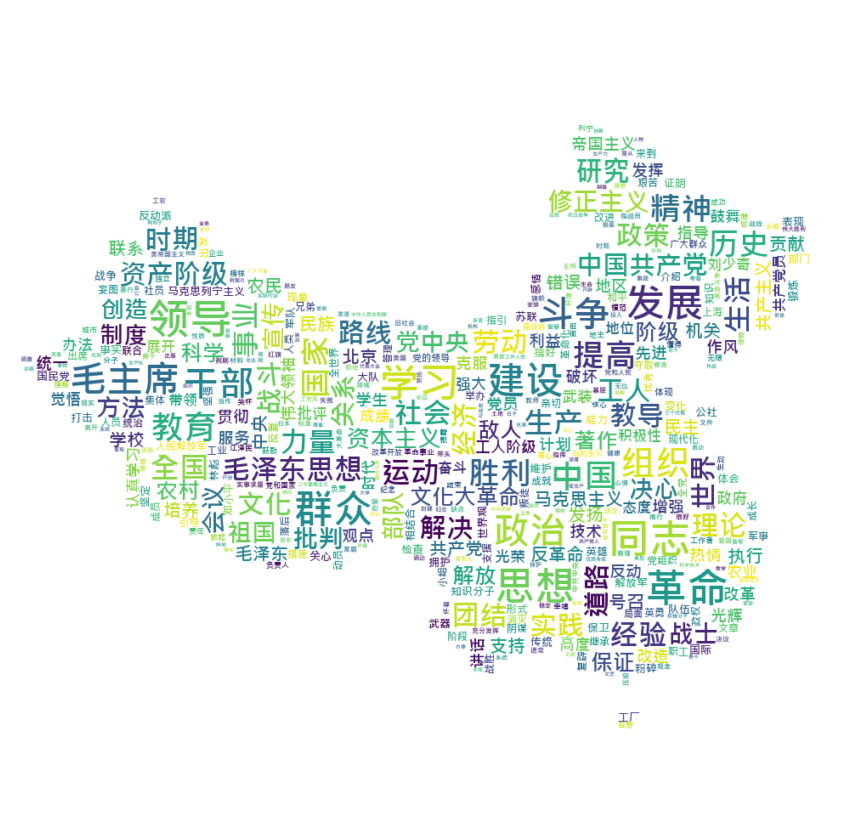

In [17]:
# 文字雲 
from PIL import Image, ImageFont, ImageDraw
from wordcloud import WordCloud, STOPWORDS   
# win10 要安裝中文字型，請拷貝 simhei.ttf, 

BKImg=np.array(Image.open(path+"pic/china.jpg"))
# mask = BKImg, 如果要設定形狀
# font_path= 選擇不同字體
# wordcloud = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf',max_font_size=100, min_font_size = 5
#                      ,background_color="white",  margin=3, width=3000, height=2000, max_words=1000)    
wordcloud = WordCloud(font_path='C:\Windows\Fonts\msjhbd.ttc',max_font_size=50, min_font_size = 5
                      ,background_color="white", mask = BKImg, margin=2, height=1000, max_words=1000,width=1000)

#wordcloud = wordcloud.generate(string)
# 字詞出現的頻率
# 取最前面之1000個字詞繪圖
import collections
word_list=string.split()
counter=collections.Counter(word_list)
most_term=counter.most_common(1000)
wrd_dict=dict(most_term)

# 以字詞的頻率 dictionary 繪圖
wordcloud = wordcloud.generate_from_frequencies(wrd_dict)    
print (counter.most_common(20))

# store to file #################################################
wordcloud.to_file("wordcloud_"+title+"_cluster"+str(cluster_sel)+".jpg")

# 繪圖
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")      
plt.show() 

# 時間趨勢


## 計算各類文章的比例

In [43]:
df

,year,filename,title,textrank,token,cluster,yes
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工...",救济 滑县 分署 河南 面粉 豫北 衣物 发放 物资 种子 农村 灾区 生产 作风 药品 工...,3,False
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,...",吸收 纵队 改进 集体创作 部队 报上 张际春 整训 文艺 工作团 军区 秧歌 广场 执笔 ...,7,False
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,...",生产 群众 驻军 连队 自给 生产队 部队 驻地 开荒 兵团 组织 文水 水地 紧张 野战 ...,8,False
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者",事业 原子弹 读者 拥护者 斗争 反法西斯 虔诚 杨秀峰 预祝 胜利 边区 司机 组织者,7,False
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵...",四平 民主 炮火 联军 阵地 战士 老百姓 东北 政府 俘虏 和平 反动派 同志 战争 士兵...,3,False
...,...,...,...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全...",职业病 澳门 诊断 防治法 鉴定 修改 政治体制 救治 安监 总局 全国人大常委会 病人 全...,1,True
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农...",会议 发展 全国人大常委会 全国人大 审议 草案 表决 经济 吴邦国 职业病 教育 保障 农...,1,False
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐...",国家 南非 成功 经济 转型 致辞 政府 社会 欧元 总理 马来西亚 总统 政治 骄傲 快乐...,6,False
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜...",全党 全军 全民 金正恩 国家 朝鲜劳动党 政治 诞辰 口号 号召 领导 金正日 军队 朝鲜...,7,False


In [46]:
year=df.year.unique()

In [57]:
a=df['cluster'].value_counts() 
df_cluster = pd.DataFrame(a).sort_index(ascending=True)
count_y=list(df_cluster.cluster)
count_y

[122947, 178927, 209976, 197728, 65402, 95783, 252573, 144676, 114519, 204107]

In [103]:
count=[]
for y in year:
    df_year=df[df.year==y]
    a=df_year['cluster'].value_counts() 
    df_cluster = pd.DataFrame(a).sort_index(ascending=True)
    # 如果某個年度，某個群數為0
    if len(year)>len(df_cluster):
        count_y=[]
        for n in range(max(cluster)+1):
            try:           
                count_y.append(int(df_cluster.loc[n]))   
            except:
                count_y.append(0)       
    else:                   
        count_y=list(df_cluster.cluster)

    rate_y=[]
    for c in count_y:    
        if sum(count_y)>0:
            # 百分比
            rate=c/sum(count_y)                    
        else:
            rate=0
        rate_y.append(rate)    
    count.append(rate_y)

df_rate=pd.DataFrame(count, index=year,columns=range(max(cluster)+1))
df_rate

,0,1,2,3,4,5,6,7,8,9
1946,0.015517,0.009276,0.017710,0.148760,0.000000,0.044190,0.450835,0.201214,0.097656,0.014842
1947,0.013472,0.009570,0.008455,0.166961,0.000186,0.042460,0.266190,0.262287,0.217969,0.012450
1948,0.009338,0.040141,0.007640,0.161897,0.000121,0.064516,0.270192,0.243512,0.184453,0.018191
1949,0.032395,0.053197,0.049915,0.144982,0.000847,0.154351,0.210777,0.220622,0.094273,0.038641
1950,0.045039,0.064000,0.061509,0.102328,0.001881,0.145740,0.268554,0.179545,0.107056,0.024349
...,...,...,...,...,...,...,...,...,...,...
2008,0.103576,0.185666,0.105960,0.198533,0.074572,0.008221,0.062042,0.031510,0.027812,0.202109
2009,0.109794,0.214267,0.096984,0.146112,0.041755,0.006853,0.060463,0.040049,0.024550,0.259174
2010,0.113058,0.222506,0.082770,0.166552,0.045766,0.006807,0.062164,0.025091,0.023205,0.252081
2011,0.109463,0.239666,0.077773,0.145483,0.043943,0.007012,0.066234,0.038899,0.023300,0.248229



## 加總各類文章篇數

In [112]:
count=[]
for y in year:
    df_year=df[df.year==y]
    a=df_year['cluster'].value_counts() 
    df_cluster = pd.DataFrame(a).sort_index(ascending=True)
    # 如果某個年度，某個群數為0
    if len(year)>len(df_cluster):
        count_y=[]
        for n in range(max(cluster)+1):
            try:           
                count_y.append(int(df_cluster.loc[n]))   
            except:
                count_y.append(0)       
    else:                   
        count_y=list(df_cluster.cluster)   
    count.append(count_y)

df_count=pd.DataFrame(count, index=year,columns=range(max(cluster)+1))
df_count.loc[1960:]

,0,1,2,3,4,5,6,7,8,9
1960,682,45,4048,1203,258,4228,6112,1905,4360,134
1961,1224,62,3822,1882,592,3030,5395,1133,4301,123
1962,1138,78,2989,1670,427,1530,5920,808,2380,170
1963,603,36,4352,1237,322,944,4774,1211,1813,125
1964,777,38,4446,1047,227,1047,5027,1992,1616,123
1965,428,22,3826,761,349,1106,5871,2076,1398,111
1966,234,18,2115,382,134,534,3430,4549,521,25
1967,102,14,862,125,5,179,2426,5167,191,27
1968,72,29,600,152,1,302,2399,5283,173,33
1969,41,22,798,198,5,430,2409,5594,355,53


## 分群數量，時間趨勢圖

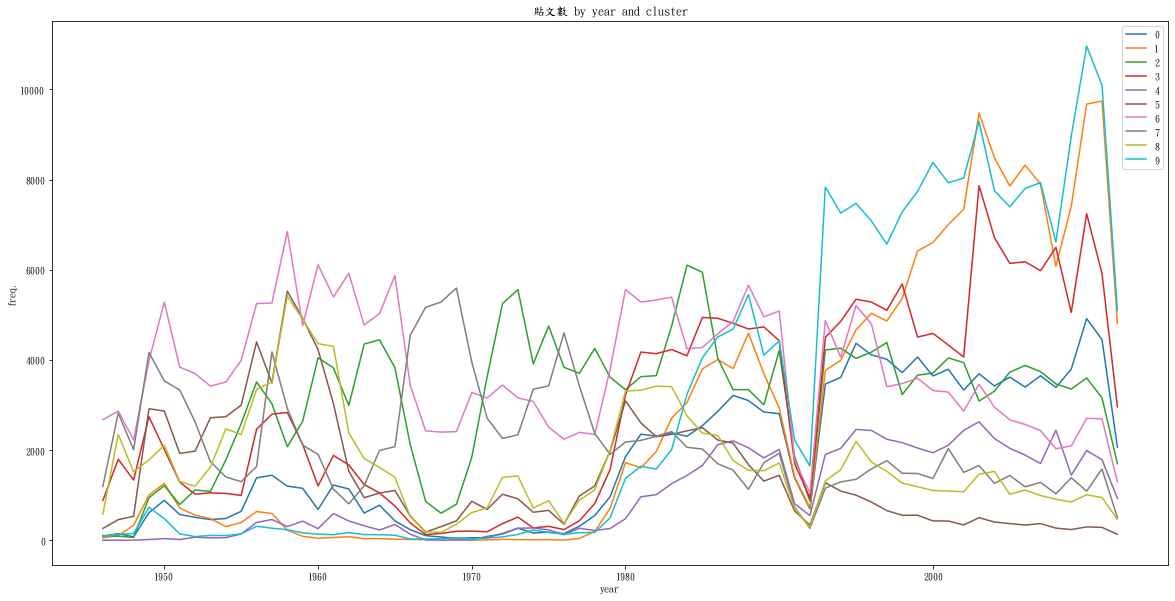

In [25]:
import matplotlib.pyplot as plt 
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# 加標題，圖例，x軸，y軸
fig, ax = plt.subplots(figsize=(20,10))
# 設定顏色，圖例，線的型態，標記
x=year
for c in range(max(cluster)+1): 
    ax.plot(x, df_count[c], label=c)
    #ax.plot(x, df_rate[c].rolling(3).mean(), label=c)       ###### rolling     
ax.set_xticks([1950,1960,1970,1980,2000])

# 圖例位置由程式自己決定
ax.legend(loc=1);  
ax.set_xlabel('year')     # X label
ax.set_ylabel('freq.')    # y lobel
# 標題
ax.set_title('貼文數 by year and cluster');   # title
plt.show()

## 分群比例，時間趨勢圖

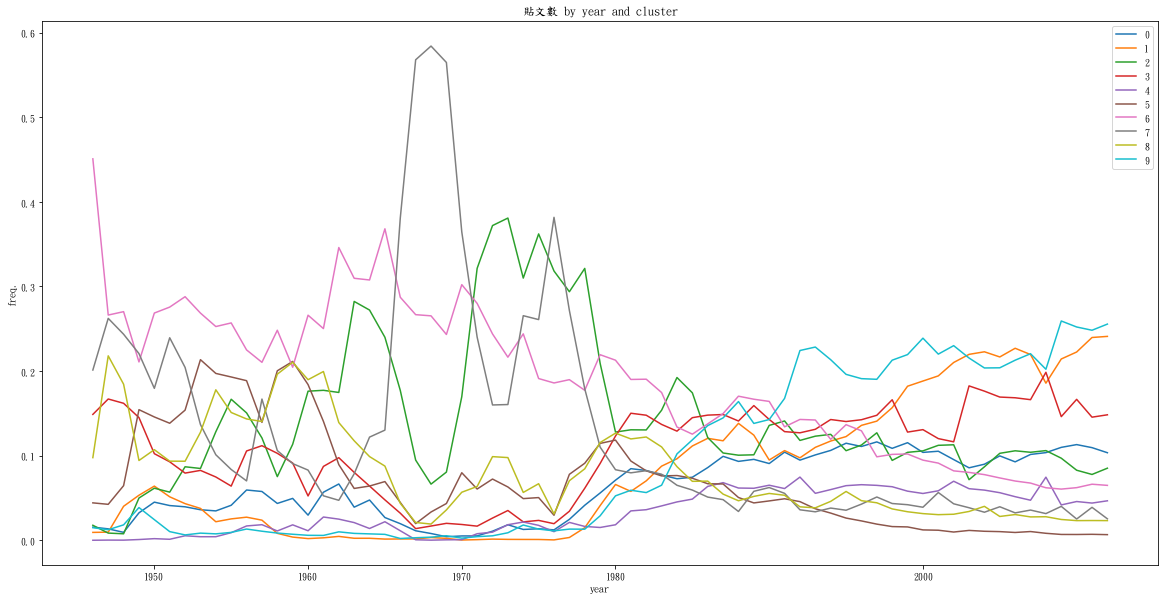

In [111]:
import matplotlib.pyplot as plt 
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# 加標題，圖例，x軸，y軸
fig, ax = plt.subplots(figsize=(20,10))
# 設定顏色，圖例，線的型態，標記
x=year
for c in range(max(cluster)+1): 
    ax.plot(x, df_rate[c], label=c)
    #ax.plot(x, df_rate[c].rolling(3).mean(), label=c)       ###### rolling     
ax.set_xticks([1950,1960,1970,1980,2000])

# 圖例位置由程式自己決定
ax.legend(loc=1);  
ax.set_xlabel('year')     # X label
ax.set_ylabel('freq.')    # y lobel
# 標題
ax.set_title('貼文數 by year and cluster');   # title
plt.show()

## 各群文章比例時間疊加圖

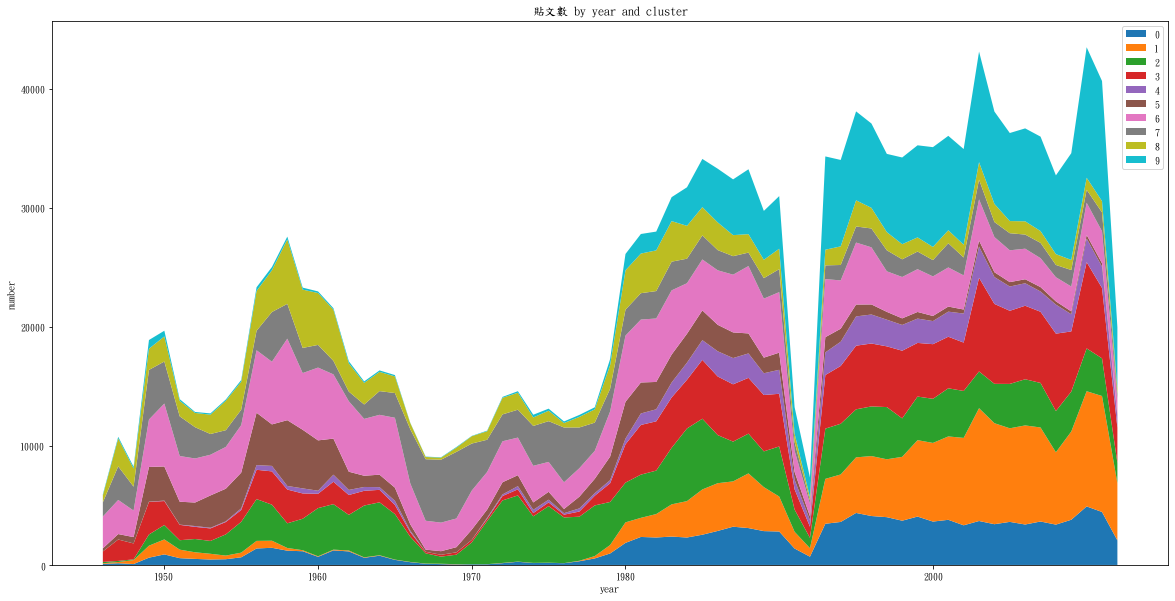

In [110]:

import matplotlib.pyplot as plt 
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# 加標題，圖例，x軸，y軸
fig, ax = plt.subplots(figsize=(20,10))

# 設定顏色，圖例，線的型態，標記
x=year
ax.set_xticks([1950,1960,1970,1980,2000])

label=[]
for n in range(n_clus):
    label.append(str(n))

# 繪疊加圖 ##################修改類別長度
plt.stackplot(x, df_count[0], df_count[1], df_count[2], df_count[3], df_count[4], df_count[5], df_count[6], df_count[7], df_count[8], df_count[9]
      , labels=label)


# 圖例位置由程式自己決定
ax.legend(loc=0);  
ax.set_xlabel('year')     # X label
ax.set_ylabel('number')    # y lobel
# 標題
ax.set_title('貼文數 by year and cluster');   # title
plt.show()

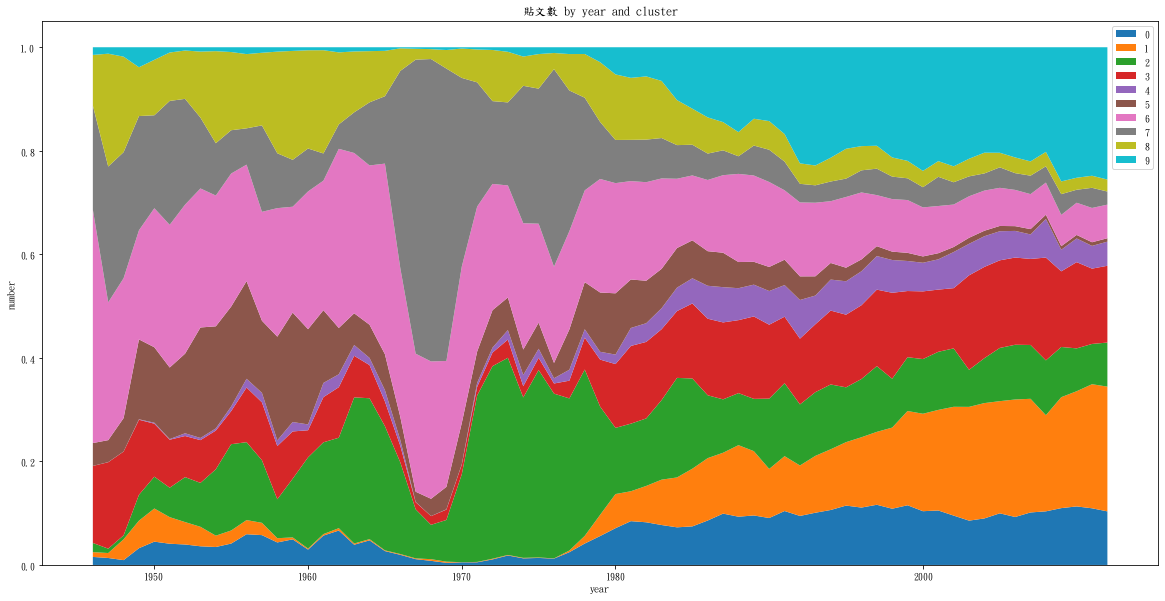

In [113]:
import matplotlib.pyplot as plt 
# 中文設定
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

# 加標題，圖例，x軸，y軸
fig, ax = plt.subplots(figsize=(20,10))

# 設定顏色，圖例，線的型態，標記
x=year
ax.set_xticks([1950,1960,1970,1980,2000])

label=[]
for n in range(n_clus):
    label.append(str(n))

# 繪疊加圖 ##################修改類別長度
plt.stackplot(x, df_rate[0], df_rate[1], df_rate[2], df_rate[3], df_rate[4], df_rate[5], df_rate[6], df_rate[7], df_rate[8], df_rate[9]
      , labels=label)


# 圖例位置由程式自己決定
ax.legend(loc=0);  
ax.set_xlabel('year')     # X label
ax.set_ylabel('number')    # y lobel
# 標題
ax.set_title('貼文數 by year and cluster');   # title
plt.show()

# 圓餅圖

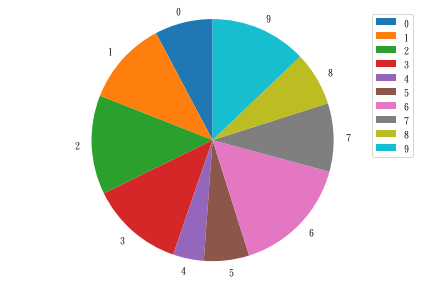

In [108]:
# percent of each cluster
percent=[]
for c in range(max(cluster)+1): 
    percent.append(cluster.count(c)/len(cluster))

labels = range(max(cluster)+1)
patches, texts = plt.pie(percent,labels=labels,shadow=False, startangle=90)
#patches, texts = plt.pie(percent,labels=labels,autopct='%1.1f%%',shadow=False, startangle=90)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.tight_layout()
plt.show()

# 加入 people 模組

In [1]:
import people


    歡迎進入 people 模組，函數列表
    資料選取
        (df, df_year)= people.doc_select(year, path, title, kw, field, unit)
        df= people.read_doc_select(path, unit, field, title)  
        df_year= people.read_doc_select_year(path, unit, field, title)  
        people.plot_doc_select_year(df_year)
        people.print_doc_select_random(df,num,title,field)
        df= people.read_doc_select_pkl(path, unit, field,title)  
    詞頻與詞對
        df= people.key_word_trend_year(kw, year,path)   
        df_corpus= people.corpus_map_year(df,title, kw, corpus,path,window)
        df_corpus= people.read_corpus_map_year(path,title)
        df_pn= people.sentiment(path, df, title)
        df_pn= people.read_sentiment(path, df, title)
    主題分析
        (df_topic, df, df_lsa)= people.topic model(doc_list,num_i, method)  
        ts= people.plot_topic_model_trend(year, df_lsa,topics, num_i) 
        (df_trend, size)= people.plot_topic_model_pei(topics, ts)
        (df_trend, size)= people.plot_topic_model_bar(t

## cluster_analysis(df, field, num_i,n_clus,path,title)
* 文章分群，df 為 dataframe，要有 year, token 欄位
* num_i為降維之維度數，n_clus 為分群之數目
* 資料多，耗時久。

In [2]:
def cluster_analysis(df,field, num_i, n_clus,path,title):
    # from __future__ import print_function
    import sklearn
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import TruncatedSVD
    from sklearn.preprocessing import Normalizer
    from sklearn import metrics
    from sklearn.cluster import KMeans, MiniBatchKMeans
    import pandas as pd
    import numpy
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import io
    import re
    import pickle

    # TFIDF 轉換
    # 文章字詞矩陣
    doc_list=df[field]
    ngram=(1,1)
    # TFIDF 加權 ####################
    print ('tfidf 加權......')
    vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)
    # df.token 為斷字後，空白隔開的字串
    dtm_tfidf = vectorizer.fit_transform(doc_list) # sparse matrix
    # 字詞的編號
    terms=vectorizer.vocabulary_
    # 字詞的 list
    term_list=vectorizer.get_feature_names_out()

    # 分群 clustering
    seg=list(df.token)  

    ## 先 SVD 降維
    print ('SVD 降維......')
    # Tfidf 轉換，文章字詞矩陣(dtm)    
    vectorizer = TfidfVectorizer(use_idf=True, ngram_range= (1,1))
    dtm = vectorizer.fit_transform(seg) 

    # SVD 降維，dtm_lsa, 每篇文章在各維度上的投影
    svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
    dtm_lsa = svd.fit_transform(dtm)  # numpy array   

    # 標準化 dtm_lsa_n, 
    dtm_lsa_n = Normalizer(copy=False).fit_transform(dtm_lsa)

    # explained_variance_ratio
    ratio=svd.explained_variance_ratio_    
    print ("total explained ratio ",sum(ratio))

    # 字詞的編號
    terms=vectorizer.vocabulary_

    # 字詞的 list
    term_list=vectorizer.get_feature_names_out() 

    # 接著指定分群數目，進行分群
    # 指定要分的群組數目 #####################################
    print ('kmeans 分群......')
    n_clus=10
    # dtm_lsa 作為分群的依據，呼叫 KMeans 函數
    kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(dtm_lsa_n)

    # 算出各群中心點座標
    cen=kmeans.cluster_centers_

    # cluster 的類別
    cluster=list(kmeans.labels_)

    ## 分群結果增加新欄位 ---------------------------------------
    df['cluster']=cluster  

    # 各群組內的文章 token 合併成 string
    clus_token=[]
    for n in range(n_clus):
        string=''
        df_sel=df[df.cluster==n]
        for n in range(len(df_sel)):
            string=string + ' ' +df_sel.token.iloc[n]
        clus_token.append(string)   

    ## 計算各類文章的比例----------------------------------------
    print ('計算各類文章的總數與比例......')
    count=[]
    year=df.year.unique()
    for y in year:
        df_year=df[df.year==y]
        a=df_year['cluster'].value_counts() 
        df_cluster = pd.DataFrame(a).sort_index(ascending=True)
        # 如果某個年度，某個群數為0
        if len(year)>len(df_cluster):
            count_y=[]
            for n in range(max(cluster)+1):
                try:           
                    count_y.append(int(df_cluster.loc[n]))   
                except:
                    count_y.append(0)       
        else:                   
            count_y=list(df_cluster.cluster)

        rate_y=[]
        for c in count_y:    
            if sum(count_y)>0:
                # 百分比
                rate=c/sum(count_y)                    
            else:
                rate=0
            rate_y.append(rate)    
        count.append(rate_y)
    df_rate=pd.DataFrame(count, index=year,columns=range(max(cluster)+1))

    ## 加總各類文章篇數 -------------------------------------------
    count=[]
    for y in year:
        df_year=df[df.year==y]
        a=df_year['cluster'].value_counts() 
        df_cluster = pd.DataFrame(a).sort_index(ascending=True)
        # 如果某個年度，某個群數為0
        if len(year)>len(df_cluster):
            count_y=[]
            for n in range(max(cluster)+1):
                try:           
                    count_y.append(int(df_cluster.loc[n]))   
                except:
                    count_y.append(0)       
        else:                   
            count_y=list(df_cluster.cluster)   
        count.append(count_y)
    df_count=pd.DataFrame(count, index=year,columns=range(max(cluster)+1))
    
    # save，必須要有 working 次目錄  -------------------------------   
    try:
        fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df"+".xlsx"
        writer = pd.ExcelWriter(fname)
        df.to_excel(writer,'Sheet1',encoding='utf-8')
        writer.save()  
    except:  # 如果檔案太大則存 pkl 檔
        fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df"+".pkl"
        with open(fname, "wb") as fp:   #Pickling
            pickle.dump(clus_token, fp)  
        
    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"clus_token"+".pkl"
    with open(fname, "wb") as fp:   #Pickling
        pickle.dump(clus_token, fp)       

    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df_rate"+".xlsx"
    writer = pd.ExcelWriter(fname)
    df_rate.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()        

    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df_count"+".xlsx"
    writer = pd.ExcelWriter(fname)
    df_count.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()    
    
    return df, clus_token, df_rate, df_count

## 讀取資料檔 textrank, all

In [3]:
# 讀取檔案 #######################################
import pandas as pd
# 必須要有的參數
unit="arti"
field="textrank"
path="D:/my python/people/" 
title="all"
fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
df=people.read_doc_select(path, unit, field, title) 
df['token']=df.textrank.str.replace(","," ")
df

,year,filename,title,textrank,token
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工...",救济 滑县 分署 河南 面粉 豫北 衣物 发放 物资 种子 农村 灾区 生产 作风 药品 工...
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,...",吸收 纵队 改进 集体创作 部队 报上 张际春 整训 文艺 工作团 军区 秧歌 广场 执笔 ...
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,...",生产 群众 驻军 连队 自给 生产队 部队 驻地 开荒 兵团 组织 文水 水地 紧张 野战 ...
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者",事业 原子弹 读者 拥护者 斗争 反法西斯 虔诚 杨秀峰 预祝 胜利 边区 司机 组织者
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵...",四平 民主 炮火 联军 阵地 战士 老百姓 东北 政府 俘虏 和平 反动派 同志 战争 士兵...
...,...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全...",职业病 澳门 诊断 防治法 鉴定 修改 政治体制 救治 安监 总局 全国人大常委会 病人 全...
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农...",会议 发展 全国人大常委会 全国人大 审议 草案 表决 经济 吴邦国 职业病 教育 保障 农...
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐...",国家 南非 成功 经济 转型 致辞 政府 社会 欧元 总理 马来西亚 总统 政治 骄傲 快乐...
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜...",全党 全军 全民 金正恩 国家 朝鲜劳动党 政治 诞辰 口号 号召 领导 金正日 军队 朝鲜...


In [8]:
title='textrank_clustering'
num_i=100
n_clus=10
path="D:/my python/people/" 
(df, clus_token, df_rate, df_count)=people.cluster_analysis(path,df, num_i,n_clus,title)

tfidf 加權......
SVD 降維......
total explained ratio  0.05854261247806318
kmeans 分群......
計算各類文章的總數與比例......


## read_cluster_analysis(n_clus,path,title)

In [2]:
def read_cluster_analysis(n_clus,path,title):
    import pandas as pd
    try:
        fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df"+".xlsx"
        df=pd.read_excel(fname, 0)
    except:
        fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df"+".pkl"
        with open("fname", "rb") as fp:   # Unpickling
            clus_token = pickle.load(fp)         

    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"clus_token"+".pkl"     
    with open("fname", "rb") as fp:   # Unpickling
        clus_token = pickle.load(fp)        
           
    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df_rate"+".xlsx"
    df_rate=pd.read_excel(fname, 0)    
    
    fname=path+"working/"+"cluster"+"_"+str(n_clus)+"_"+title+"_"+"df_count"+".xlsx"
    df_count=pd.read_excel(fname, 0)
    
    return df, clus_token, df_rate, df_count

In [ ]:
title='textrank_clustering'
path="D:/my python/people/" 
n_clus=10
(df, clus_token, df_rate, df_count)=people.read_cluster_analysis(path,n_clus,title)

## plot_cluster_year_trend(df, label,path)
* df 必須有 cluster, year 欄位，至多十個類別，序號從 0 起算
* label list 類別命名

In [25]:
def plot_cluster_year_trend(df, label,path):
    # df 以文本為單位，必須有 year, cluster 欄位，自動計算 rate, count by year
    # cluster 為類別，從0 起算之數字序號
    # line, bar, pie, agrigate 全部都會畫
    
    ## 計算各類文章的比例
    print ("calculate rate......")
    count=[]
    year=df.year.unique()
    n_clus=len(df.cluster.unique())       
    for y in year:
        df_year=df[df.year==y]
        a=df_year['cluster'].value_counts() 
        df_cluster = pd.DataFrame(a).sort_index(ascending=True)
        # 如果某個年度， 群組數目有缺
        if n_clus>len(df_cluster):
            count_y=[]
            for n in range(n_clus):
                try:           
                    count_y.append(int(df_cluster.loc[n]))   
                except:
                    count_y.append(0)       
        else:                   
            count_y=list(df_cluster.cluster)

        rate_y=[]
        for c in count_y:    
            if sum(count_y)>0:
                # 百分比
                rate=c/sum(count_y)                    
            else:
                rate=0
            rate_y.append(rate)    
        count.append(rate_y)
        print (y,end=" ")
    df_rate=pd.DataFrame(count, index=year,columns=range(n_clus))

    ## 加總各類文章篇數
    print ("count ......")
    count=[]
    for y in year:
        df_year=df[df.year==y]
        a=df_year['cluster'].value_counts() 
        df_cluster = pd.DataFrame(a).sort_index(ascending=True)
        # 如果某個年度，某個群數為0
        if len(year)>len(df_cluster):
            count_y=[]
            for n in range(n_clus):
                try:           
                    count_y.append(int(df_cluster.loc[n]))   
                except:
                    count_y.append(0)       
        else:                   
            count_y=list(df_cluster.cluster)   
        count.append(count_y)
        print (y,end=" ")
    df_count=pd.DataFrame(count, index=year,columns=range(n_clus))
    
    # 如果有 labels, cluster 替代為 labels
    if len(labels)!=n_clus:
         labels=list(range(n_clus)) 

    ## 分群數量，時間趨勢圖 -----------------------------------------------------
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 加標題，圖例，x軸，y軸
    fig, ax = plt.subplots(figsize=(20,10))
    # 設定顏色，圖例，線的型態，標記
    x=year
    for c in range(n_clus): 
        ax.plot(x, df_count[c], label=labels[c])
        #ax.plot(x, df_rate[c].rolling(3).mean(), label=c)       ###### rolling     
    ax.set_xticks([1950,1960,1970,1980,2000])

    # 圖例位置由程式自己決定
    ax.legend(loc=1);  
    ax.set_xlabel('year')     # X label
    ax.set_ylabel('freq.')    # y lobel
    # 標題
    ax.set_title('貼文數 by year and cluster');   # title
    plt.show()

    ## 分群比例，時間趨勢圖 -----------------------------------------------------
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 加標題，圖例，x軸，y軸
    fig, ax = plt.subplots(figsize=(20,10))
    # 設定顏色，圖例，線的型態，標記
    x=year
    for c in range(n_clus): 
        ax.plot(x, df_rate[c], label=labels[c])
        #ax.plot(x, df_rate[c].rolling(3).mean(), label=c)       ###### rolling     
    ax.set_xticks([1950,1960,1970,1980,2000])

    # 圖例位置由程式自己決定
    ax.legend(loc=1);  
    ax.set_xlabel('year')     # X label
    ax.set_ylabel('freq.')    # y lobel
    # 標題
    ax.set_title('貼文數 by year and cluster');   # title
    plt.show()

    ## 各群文章比例時間疊加圖 -------------------------------------------------------
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 加標題，圖例，x軸，y軸
    fig, ax = plt.subplots(figsize=(20,10))
    # 設定顏色，圖例，線的型態，標記
    x=year
    ax.set_xticks([1950,1960,1970,1980,2000])

    # count繪疊加圖 ##################修改類別長度------------------------------------------------------
    plt.stackplot(x, df_count[0], df_count[1], df_count[2], df_count[3], df_count[4], df_count[5], df_count[6], df_count[7], df_count[8], df_count[9]
          , labels=labels)

    # 圖例位置由程式自己決定
    ax.legend(loc=0);  
    ax.set_xlabel('year')     # X label
    ax.set_ylabel('number')    # y lobel
    # 標題
    ax.set_title('貼文數 by year and cluster');   # title
    plt.show()

    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 加標題，圖例，x軸，y軸
    fig, ax = plt.subplots(figsize=(20,10))

    # 設定顏色，圖例，線的型態，標記
    x=year
    ax.set_xticks([1950,1960,1970,1980,2000])

    # rate繪疊加圖 ##################修改類別長度--------------------------------------------
    plt.stackplot(x, df_rate[0], df_rate[1], df_rate[2], df_rate[3], df_rate[4], df_rate[5], df_rate[6], df_rate[7], df_rate[8], df_rate[9]
          , labels=labels)
    # 圖例位置由程式自己決定
    ax.legend(loc=0);  
    ax.set_xlabel('year')     # X label
    ax.set_ylabel('number')    # y lobel
    # 標題
    ax.set_title('貼文數 by year and cluster');   # title
    plt.show()

    # 圓餅圖 --------------------------------------------
    # percent of each cluster
    cluster=list(df.cluster)
    percent=[]
    for c in range(n_clus): 
        percent.append(cluster.count(c)/len(cluster))

    patches, texts = plt.pie(percent,labels=labels,shadow=False, startangle=90)
    #patches, texts = plt.pie(percent,labels=labels,autopct='%1.1f%%',shadow=False, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # 長條圖 --------------------------------------------
    # percent of each cluster
    total=[]
    for c in range(n_clus): 
        total.append(cluster.count(c))
    plt.bar(labels,total)
    plt.show()
    return df_count, df_year

calculate rate......
1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 count ......
1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 

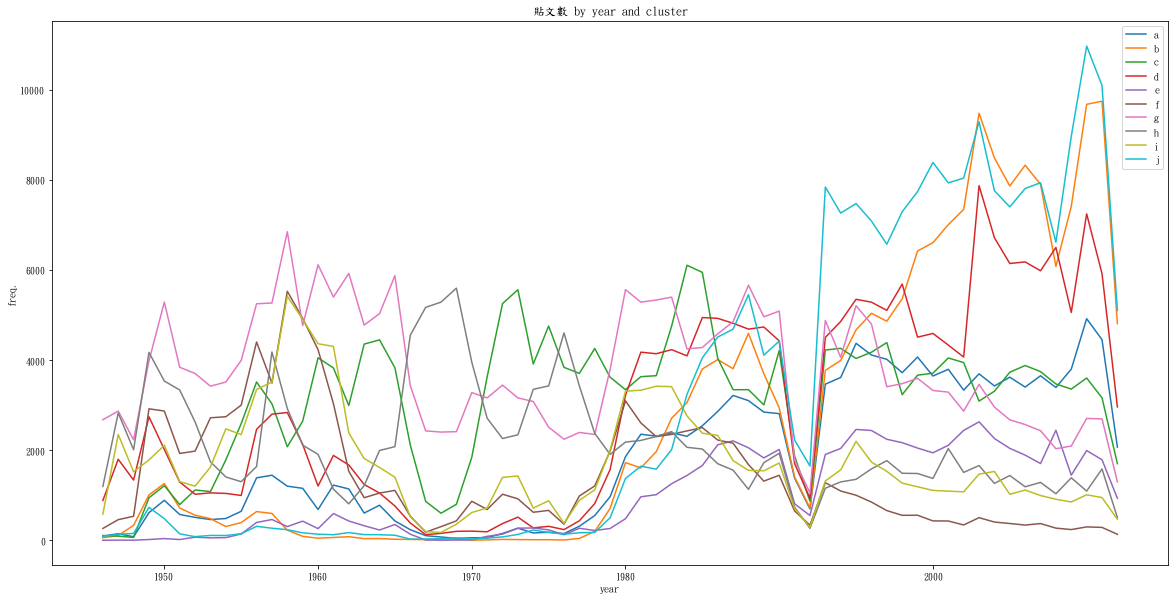

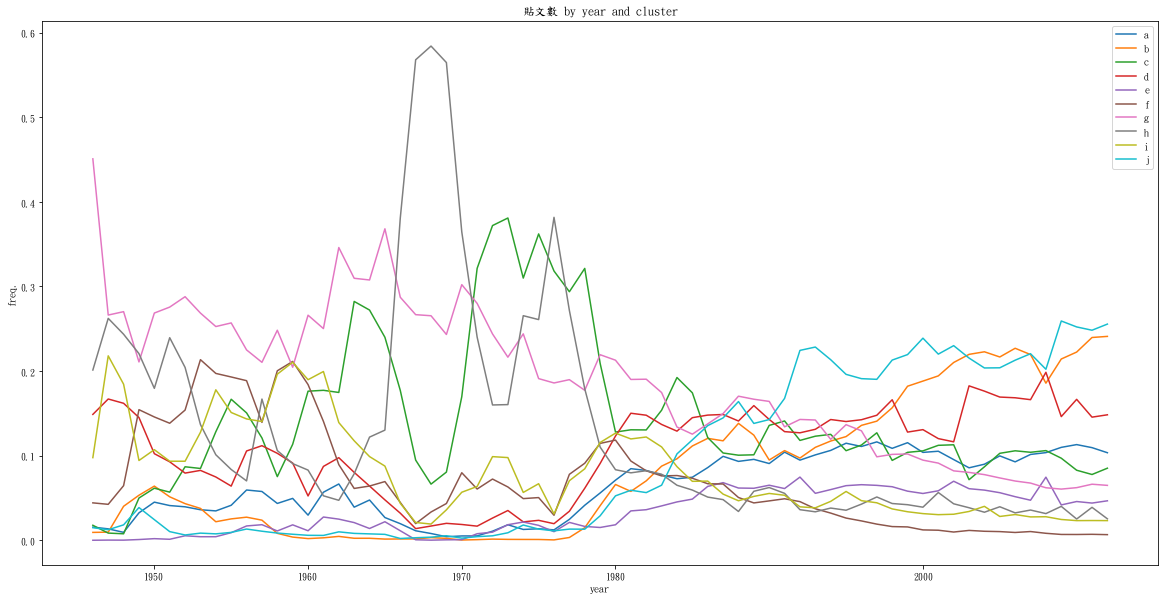

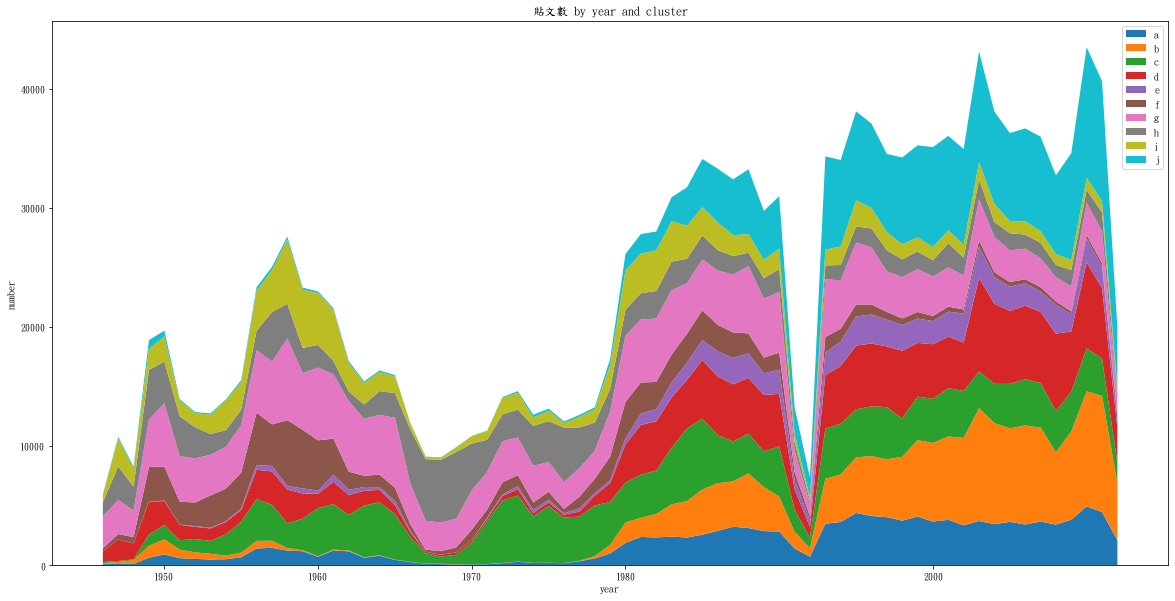

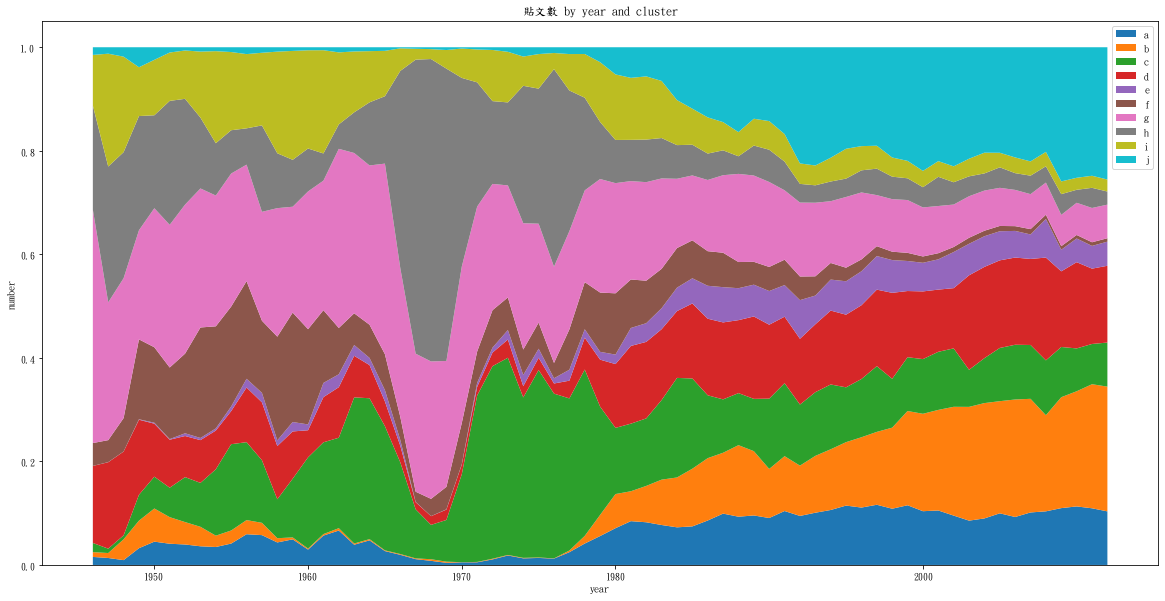

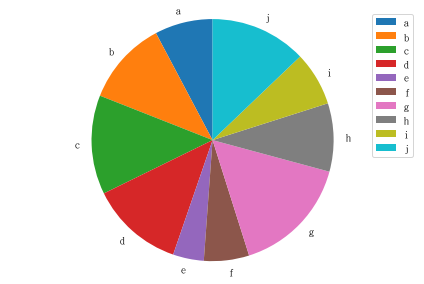

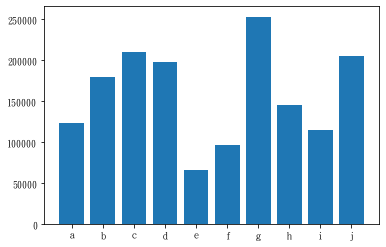

In [26]:
labels=["a","b","c","d","e","f","g","h","i","j"]
(df_count, df_rate)=plot_cluster_year_trend(path, df,labels)

## word_cloud_map(words,title, mask, max_font_size,min_font_size, max_words, margin, color,path)

In [47]:
def word_cloud_map(words,title,mask='circle.jpg', max_font_size=50 ,min_font_size=3, max_words=500, margin=1, color='white', path='D:/my python/people/'):
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image, ImageFont, ImageDraw
    from wordcloud import WordCloud, STOPWORDS   
    import collections
    # win10 要安裝中文字型，請拷貝 simhei.ttf, 

    BKImg=np.array(Image.open(path+mask))
    # mask = BKImg, 設定形狀
    # font_path= 選擇不同字體 
    wordcloud = WordCloud(font_path='C:\Windows\Fonts\msjhbd.ttc',max_font_size=max_font_size, min_font_size = min_font_size
                          ,background_color="white", mask = BKImg, margin=margin, height=1000, max_words=1000,width=1000)

    #wordcloud = wordcloud.generate(string)
    # 字詞出現的頻率
    # 取最前面之1000個字詞繪圖
    if type(words)== str:
        word_list=words.split()
        counter=collections.Counter(word_list)
        most_term=counter.most_common(1000)
        wrd_dict=dict(most_term)   
    elif type(words)==dict:
        wrd_dict=words
    elif type(words)==list:
        counter=collections.Counter(words)
        most_term=counter.most_common(1000)
        wrd_dict=dict(most_term)         
    else: # 應是 dataframe
        dict(zip(words.word, words.freq))

    # 以字詞的頻率 dictionary 繪圖
    wordcloud = wordcloud.generate_from_frequencies(wrd_dict)    
    print (counter.most_common(20))

    # store to file #################################################
    wordcloud.to_file(path+"plot/wordcloud_"+title+"_cluster"+".jpg")

    # 繪圖
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")      
    plt.show() 

[('领导', 77045), ('同志', 74860), ('革命', 74627), ('思想', 69456), ('学习', 67993), ('群众', 66647), ('发展', 63065), ('建设', 61644), ('政治', 55355), ('斗争', 54435), ('毛主席', 53588), ('干部', 52009), ('组织', 49908), ('中国', 48581), ('教育', 47069), ('提高', 45780), ('国家', 43598), ('胜利', 42825), ('精神', 42636), ('历史', 41221)]


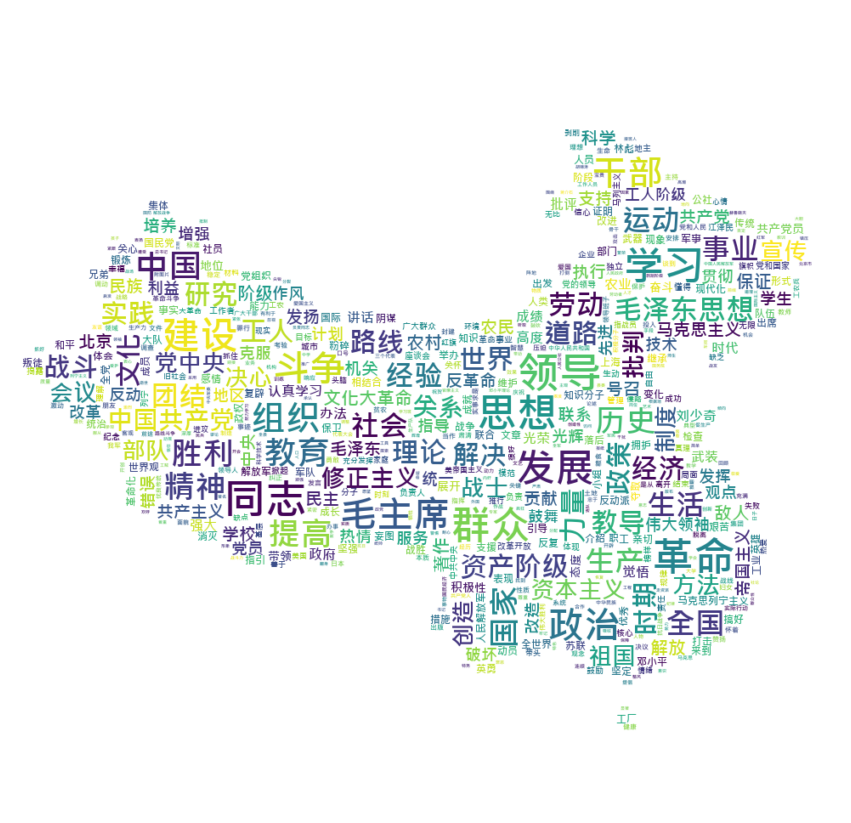

In [49]:
words=clus_token[7]
path="D:/my python/people/" 
title="textrank_cluster_7"
mask="pic/china.jpg"
max_font_size=50
min_font_size=5
max_words=1000
margin=2
color="white"
word_cloud_map(words,title, mask, max_font_size,min_font_size, max_words, margin, color,path)

## read_excel_file(path, filename)

In [50]:
def read_excel_file(path, filename):
    import pandas as pd
    fname=filename
    df=pd.read_excel(fname, 0)
    return df

In [51]:
filename=path+"working/sent_pn邓小平.xlsx"
df=read_excel_file(path, filename)

## def plot_variables_compare(df, variables, path)
* 指定若干變數，df 必須有 variables, year 欄位
* variables 為 list of string
* 繪製 盒狀圖、bar、ide 圖

In [52]:
def plot_variables_compare(df, variables, path):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"
    vari=[]
    for v in variables:
        vari.append(df[v])

    vari_number=[]
    vari_mean=[]
    vari_std=[]
    vari_name=[]
    vari_total=[]
    for v in range(len(variables)):
        vari_name.append(variables[v])
        vari_number.append(len(vari[v]))
        vari_total.append(sum(vari[v]))
        vari_std.append(np.std(vari[v]))
        vari_mean.append(np.mean(vari[v]))
    data=list(zip(vari_name, vari_number, vari_mean, vari_total, vari_std))
    df_cat=pd.DataFrame(data, columns=["name","number","mean","total","std"])

    # 圖面大小
    plt.figure(figsize=(8,6))
    # 繪製盒狀圖
    plt.boxplot(vari,labels=variables)
    # 標準
    plt.title(title+'盒狀圖')    # 標題
    plt.show()          
    return df_cat

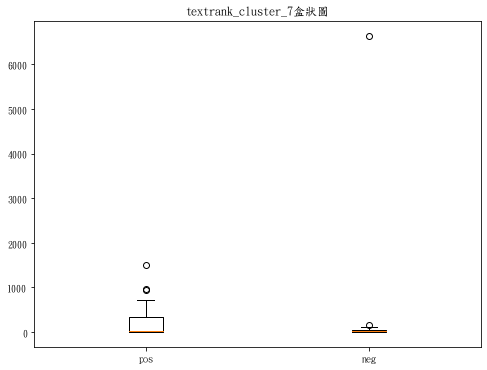

In [54]:
variables=["pos","neg"]
df_cat=plot_variables_compare(df, variables, path)

## plot_single_variable_cate(df, variable,cate, path)
* 指定若干變數，df 必須有 variable, year 欄位
* variable 可為 string or list of string
* 繪製 盒狀圖、bar、ide 圖

In [55]:
def plot_single_variable_cate(df, variable,cate, path):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"
    
    category=df['cate'].unique()
    vari=[]
    for c in category:
        df_cat=df[df[cate]==c]
        vari.append(df_cat[variable])

    vari_number=[]
    vari_mean=[]
    vari_std=[]
    vari_name=[]
    vari_total=[]
    for v in range(len(vari)):
        vari_name.append(category[v])
        vari_number.append(len(vari[v]))
        vari_total.append(sum(vari[v]))
        vari_std.append(np.std(vari[v]))
        vari_mean.append(np.mean(vari[v]))
    data=list(zip(vari_name, vari_number, vari_mean, vari_total, vari_std))
    df_cat=pd.DataFrame(data, columns=["name","number","mean","total","std"])

    # 繪製盒狀圖 --------------------------------------------------------

    # 圖面大小
    plt.figure(figsize=(8,6))
    plt.boxplot(vari,labels=category)
    # 標準
    plt.title(title+'盒狀圖')    # 標題
    plt.show()          
    return df_cat


In [56]:
cate=[]
for n in range(len(df)):
    if df.year[n]<1978:
        cate.append(0)
    else:
        cate.append(1)
df['cate']=cate
df

,Unnamed: 0,year,褒獎詞,貶抑詞,反革命,count,pos,neg,anti,pos%,neg%,cate
0,1946,1946,[],[],"[('国民党', 1), ('反动派', 1), ('蒋贼', 1)]",22,0,0,3,0.000000,0.000000,0
1,1947,1947,"[('卓越', 1), ('英雄', 1)]",[],"[('蒋家', 1), ('蒋军', 1)]",27,2,0,2,0.074074,0.000000,0
2,1948,1948,[],[],[],21,0,0,0,0.000000,0.000000,0
3,1949,1949,[],"[('残酷', 1), ('屠杀', 1)]","[('国民党军', 3), ('国民党', 7), ('胡风', 1), ('反动势力', ...",48,0,2,16,0.000000,0.041667,0
4,1950,1950,[],[],"[('国民党军', 1), ('胡匪', 1), ('国民党', 1), ('反动', 1)...",51,0,0,5,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62,2008,2008,"[('宝贵', 28), ('贡献', 84), ('后继有人', 1), ('历史使命',...","[('腐败', 14), ('污蔑', 1), ('破坏', 2), ('不惜血本', 1)...","[('现实主义', 1), ('资本家', 1), ('知识分子', 7), ('贿赂', ...",1927,388,68,32,0.201349,0.035288,1
63,2009,2009,"[('高素质', 7), ('贡献', 66), ('丰富', 18), ('宝贵', 22...","[('落后', 4), ('错误', 15), ('消极', 2), ('腐败', 2), ...","[('官僚主义', 5), ('霸权主义', 1), ('四人帮', 4), ('资本主义'...",1597,360,48,24,0.225423,0.030056,1
64,2010,2010,"[('贡献', 76), ('宝贵', 11), ('新世纪', 21), ('丰富', 1...","[('剥削', 1), ('破坏', 1), ('不正当', 1), ('不成熟', 2),...","[('国民党', 3), ('右倾翻案风', 1), ('教条主义', 1), ('四人帮'...",987,251,21,16,0.254306,0.021277,1
65,2011,2011,"[('创造性', 7), ('光辉', 8), ('贡献', 73), ('历史使命', 3...","[('坑害', 1), ('勒索', 1), ('倒行逆施', 1), ('封闭', 2),...","[('富农', 1), ('四人帮', 2), ('知识分子', 3), ('反动派', 1...",1757,333,48,40,0.189528,0.027319,1


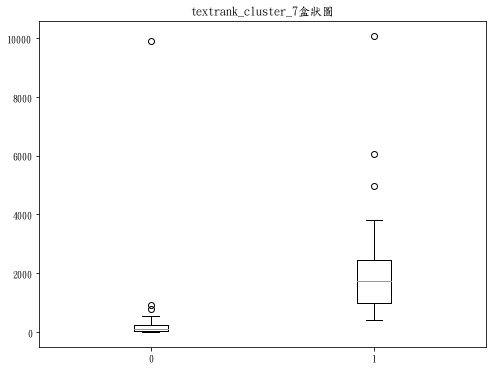

In [57]:
cate='cate'
variable='count'
df_cat=plot_single_variable_cate(df, variable,cate, path)

## def plot_variables_year_trend(df, variables, path)
* 指定若干變數，df 必須有 variable, year 欄位
* variable 可為 string or list of string
* 繪製 line 圖

In [58]:
def plot_variables_year_trend(df, variables, path):
    import numpy as np
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"    
    #繪整至年 
    year=[1948,1949,
          1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
          1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
          1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
          1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
          1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
          2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
          2010,2011,2012]
    if len(df)!= len(year):
        vari=[year]
        for v in variables:
            vari_sub=[]
            for y in year:
                df_year=df[df.year==y]
                if len(df_year)>0:
                    vari_sub.append(df_year[v].mean())
                else:
                    vari_sub.append(0)
            vari.append(vari_sub)  
        # list transpose
        vari=np.array(vari).T.tolist()      
        df_mean=pd.DataFrame(vari, index=year,columns=["year"]+variables)
    else:
        df_mean=df[["year"]+variables].copy()

    # line chart ------------------------------------------------
    import matplotlib.pyplot as plt 
    # 中文設定
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 加標題，圖例，x軸，y軸
    fig, ax = plt.subplots(figsize=(10,6))
    # 設定顏色，圖例，線的型態，標記
    for c in range(len(variables)): 
        ax.plot(year, df_mean[variables[c]], label=variables[c])
    ax.set_xticks([1950,1960,1970,1980,1990,2000])

    # 圖例位置由程式自己決定
    ax.legend(loc=1);  
    ax.set_xlabel('year')     # X label
    ax.set_ylabel('value')    # y lobel
    # 標題
    ax.set_title(title);   # title
    plt.show()
    return df_mean


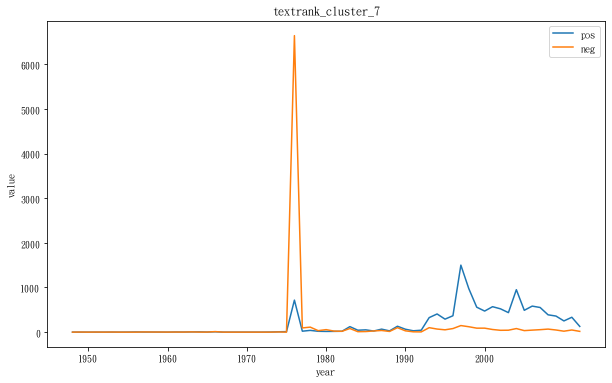

In [60]:
variables=["pos","neg"]
df_mean=plot_variables_year_trend(df, variables, path)